In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error
import random
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')
import os
os.chdir("/content/gdrive/MyDrive/CS640/Project_Dataset")


Mounted at /content/gdrive


In [ ]:
data = pd.read_csv("./scores.csv")

In [ ]:
data.shape

(150, 4)

In [ ]:
features = data.iloc[:, :-1]
scores = data.iloc[:, -1]

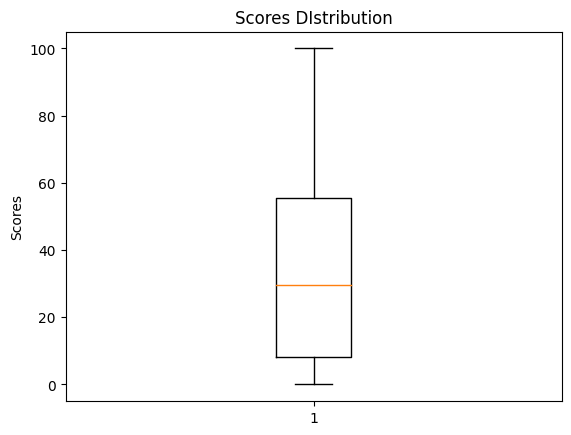

In [ ]:
plt.boxplot(list(scores))
plt.title('Scores DIstribution')
plt.ylabel('Scores')
plt.show()

In [ ]:
features = np.array(features)
scores = np.array(scores)

In [ ]:
my_list = list(range(0, 150))
random.shuffle(my_list)
divided_list = [my_list[i: i + 25] for i in range(0, len(my_list), 25)]
print(divided_list)

[[30, 89, 127, 93, 43, 130, 37, 95, 113, 143, 134, 125, 114, 118, 123, 117, 84, 145, 122, 121, 50, 81, 4, 65, 34], [57, 60, 137, 119, 116, 18, 82, 1, 64, 105, 111, 135, 91, 139, 106, 49, 92, 36, 19, 102, 14, 21, 115, 3, 2], [79, 112, 6, 75, 28, 66, 138, 54, 86, 80, 87, 109, 142, 108, 26, 17, 96, 29, 52, 140, 42, 44, 124, 38, 148], [85, 56, 40, 72, 101, 53, 132, 62, 129, 23, 41, 0, 69, 24, 8, 99, 7, 98, 45, 76, 120, 67, 51, 55, 16], [71, 31, 128, 10, 32, 15, 149, 131, 25, 35, 59, 47, 20, 39, 22, 78, 58, 63, 88, 74, 13, 5, 133, 104, 97], [61, 136, 70, 147, 77, 12, 103, 9, 33, 100, 11, 83, 27, 46, 73, 146, 68, 107, 144, 126, 94, 110, 141, 90, 48]]


In [ ]:
def bar_plot_comparison(predicted, actual): # predicted and predicted and actual are three list of scores to compare
  x = list(range(0, len(actual)))

  barWidth = 0.3
  r1 = range(len(x))
  r2 = [x + barWidth for x in r1]

  plt.figure(figsize=(14, 7))

  plt.bar(r1, predicted, color='blue', width=barWidth, edgecolor='black', label='Predicted')
  plt.bar(r2, actual, color='green', width=barWidth, edgecolor='black', label='Actual')

  plt.xlabel('X-axis')
  plt.ylabel('Scores')
  plt.xticks([r + barWidth for r in range(len(x))], x)

  plt.legend()
  plt.show()

Round 1


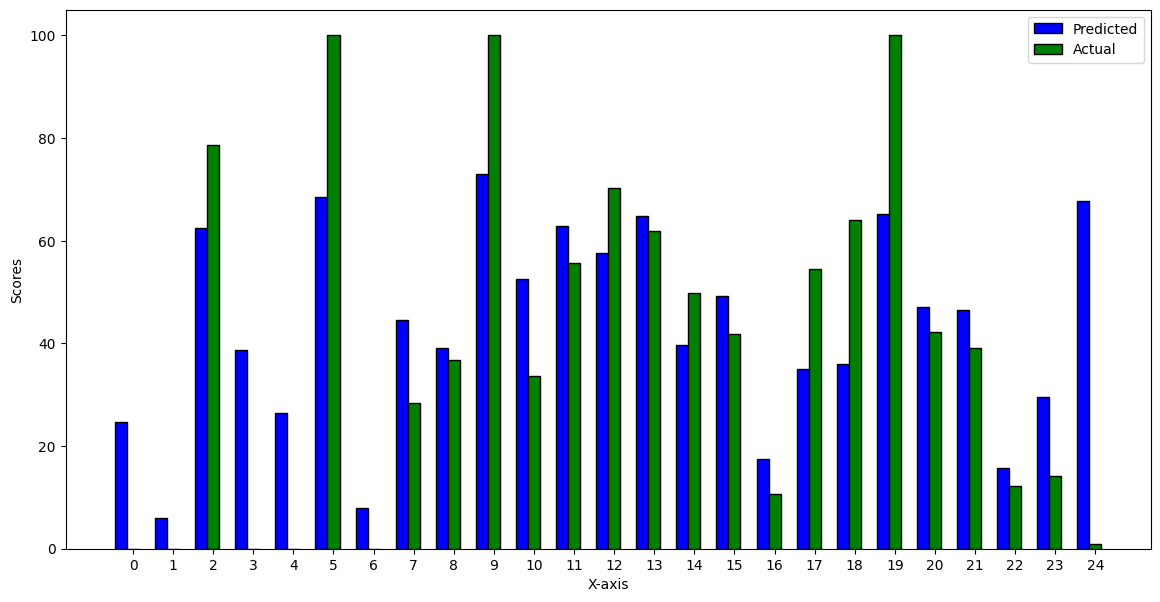

MSE is:  523.4503966540836
Round 2


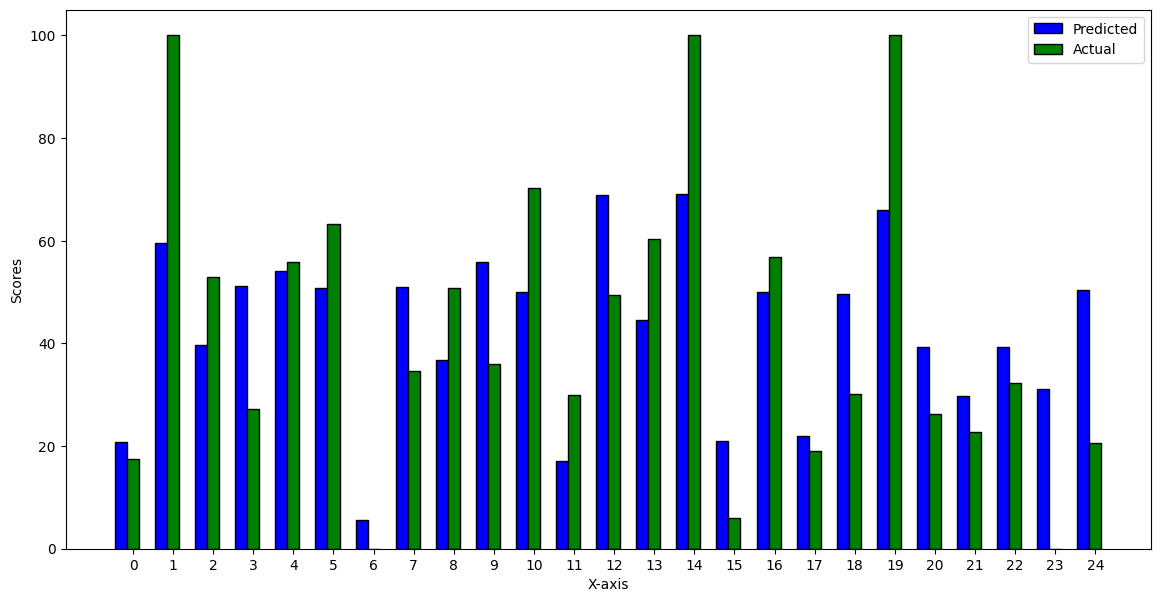

MSE is:  381.81652869453313
Round 3


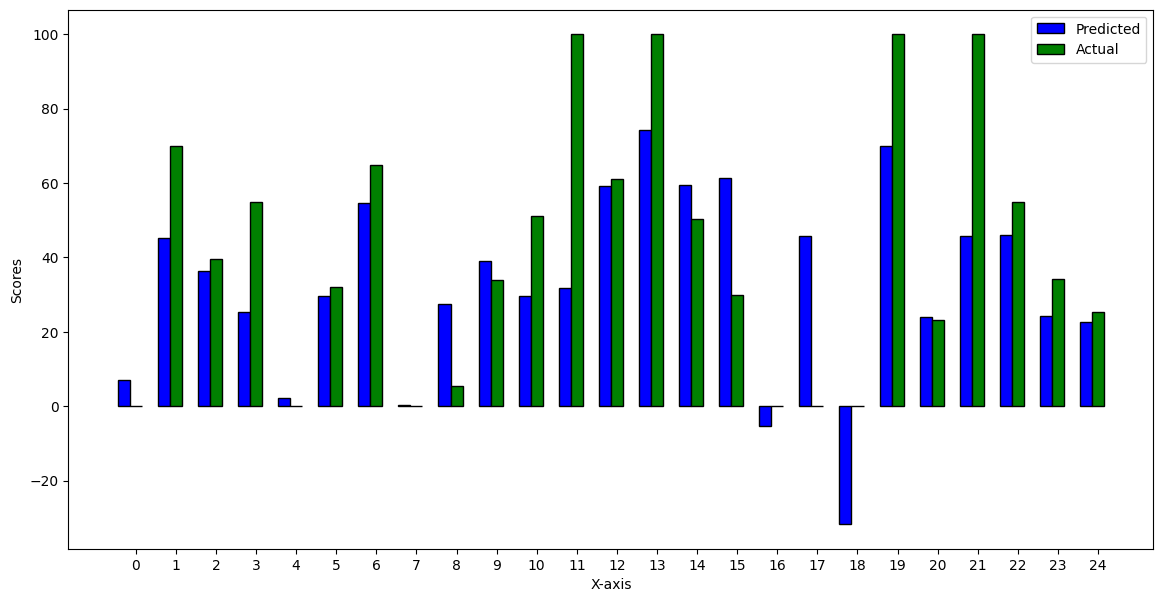

MSE is:  647.956004973852
Round 4


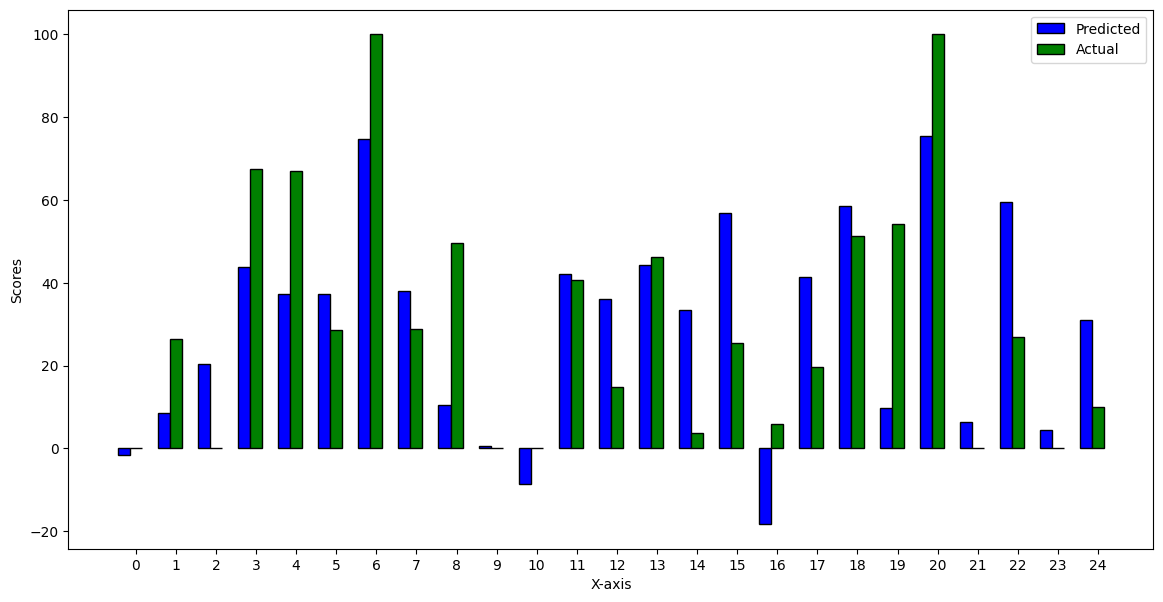

MSE is:  486.14349725563494
Round 5


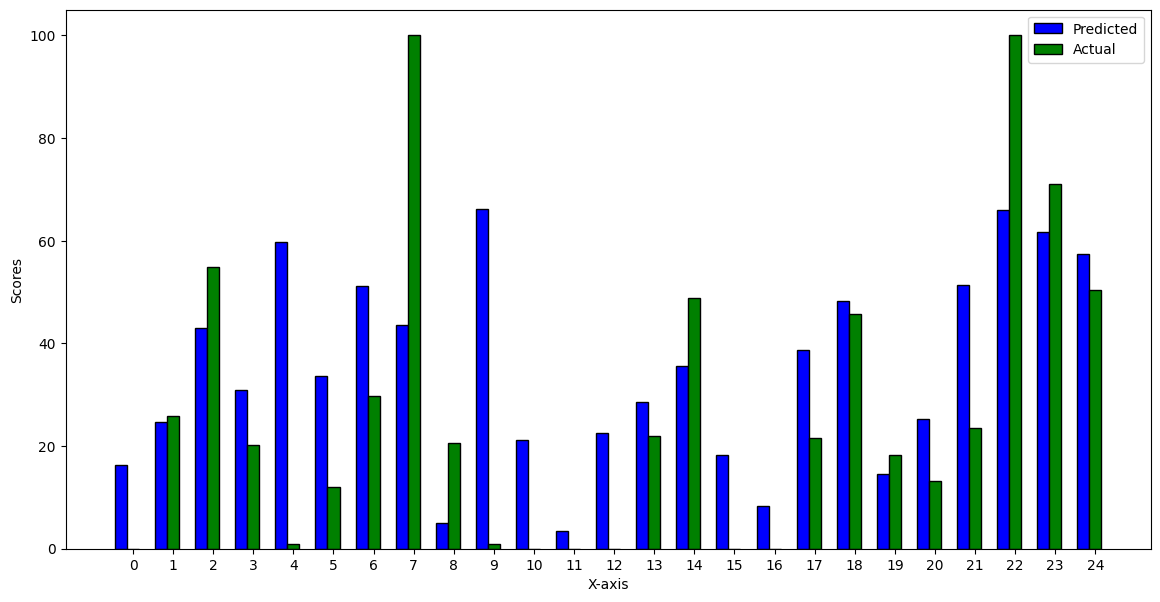

MSE is:  668.5770816772849
Round 6


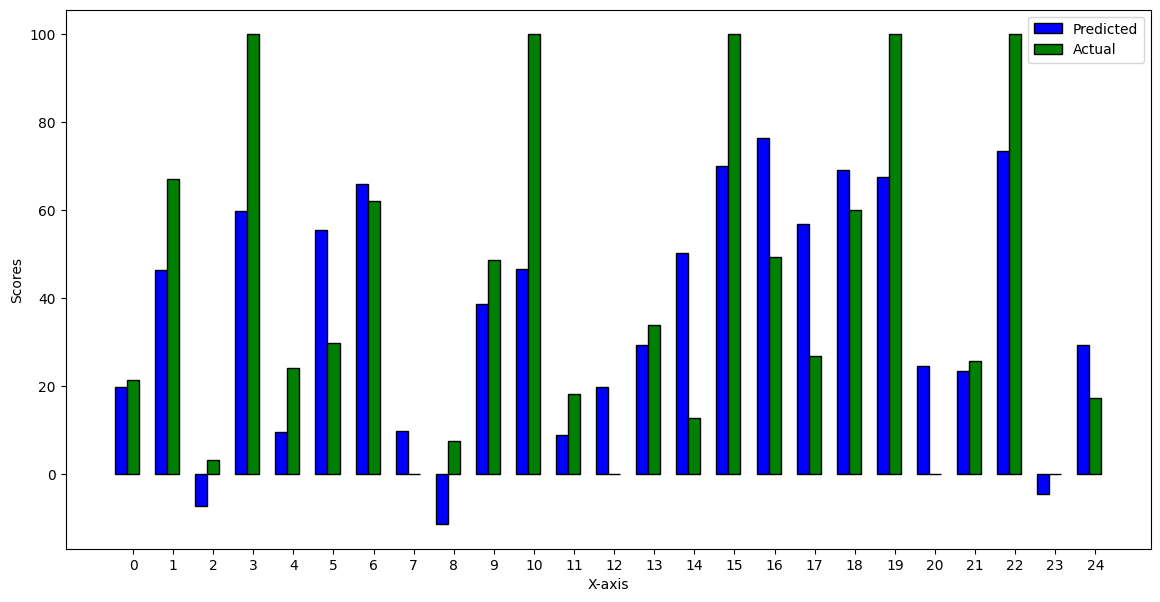

MSE is:  539.5955287102415


In [ ]:
i = 0
for sel in divided_list:
  i += 1
  print("Round " + str(i))
  train_features = features[list(set(range(features.shape[0])) - set(sel))]
  train_scores = scores[list(set(range(features.shape[0])) - set(sel))]  
  test_features = features[sel]
  test_scores = scores[sel]
  
  model = LinearRegression()
  model.fit(train_features, train_scores)
  result = model.predict(test_features)

  bar_plot_comparison(result, test_scores)

  mse = mean_squared_error(result ,test_scores)
  print("MSE is: ", mse)


